In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Предобработка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/da-1-real_estate_data.csv', sep = '\t')

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Обнаружены пропуски в следующих столбцах:
- ceiling_height — высота потолков (м);
- floors_total — всего этажей в доме;
- living_area — жилая площадь в квадратных метрах(м²);
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- balcony — число балконов;
- locality_name — название населённого пункта;
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- cityCenters_nearest — расстояние до центра города (м);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия).

Следующие столбцы невозможно заполнить:
-   ceiling_height
-   floors_total
-    kitchen_area
-    days_exposition
-    cityCenters_nearest
-    locality_name
Пока оставляю пустыми, дальше посмотрю, что с ними можно сделать

In [ ]:
def liver(row):
    if np.isnan(row['living_area']):
        return df.groupby(['locality_name', 'rooms'])['living_area'].median(
        ).to_dict().get((row['locality_name'], row['rooms']))
    return row['living_area']

In [ ]:
df['living_area'] = df.apply(liver, axis=1)

In [ ]:
df['living_area'].isna().sum()

60

In [ ]:
df.loc[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
164,6,800000.0,40.30,2018-06-25T00:00:00,2,NaN,3.0,NaN,1,NaN,False,False,NaN,2.0,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.0
595,16,1850000.0,60.90,2019-03-21T00:00:00,3,2.55,5.0,NaN,2,NaN,False,False,6.00,NaN,посёлок Победа,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,10,1950000.0,62.00,2015-02-19T00:00:00,3,NaN,5.0,NaN,5,NaN,False,False,NaN,NaN,поселок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,1069.0
1451,10,1150000.0,33.00,2016-11-28T00:00:00,1,NaN,3.0,NaN,3,False,False,False,NaN,2.0,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.0
1985,0,950000.0,33.20,2018-02-06T00:00:00,1,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,село Паша,NaN,NaN,NaN,NaN,NaN,NaN,45.0
2409,4,1980000.0,27.00,2018-03-23T00:00:00,0,NaN,18.0,NaN,4,NaN,True,False,NaN,NaN,посёлок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
2462,18,7900000.0,201.50,2018-08-17T00:00:00,7,NaN,2.0,NaN,2,NaN,False,False,NaN,NaN,посёлок Парголово,54990.0,20665.0,0.0,NaN,0.0,NaN,35.0
3147,7,2170000.0,31.00,2017-12-30T00:00:00,0,2.60,12.0,NaN,12,NaN,True,False,NaN,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.0
3334,10,1100000.0,41.00,2019-04-05T00:00:00,2,NaN,2.0,NaN,2,NaN,False,False,7.20,NaN,деревня Пчева,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4307,5,5300000.0,74.00,2017-04-01T00:00:00,3,2.50,4.0,NaN,4,NaN,False,False,NaN,NaN,деревня Агалатово,NaN,NaN,NaN,NaN,NaN,NaN,624.0


In [ ]:
def liver2(row):
    if np.isnan(row['living_area']):
        return df.groupby(['locality_name'])['living_area'].median(
        ).to_dict().get((row['locality_name']))
    return row['living_area']

In [ ]:
df['living_area'] = df.apply(liver2, axis=1)

In [ ]:
df['living_area'].isna().sum()

22

In [ ]:
def liver3(row):
    if np.isnan(row['living_area']):
        return df.groupby(['rooms'])['living_area'].median(
        ).to_dict().get((row['rooms']))
    return row['living_area']

In [ ]:
df['living_area'] = df.apply(liver3, axis=1)

In [ ]:
df['living_area'].isna().sum()

0

In [ ]:
df['living_area'].sample(10)

13162    44.8
21411    17.3
5900     29.6
13935    17.9
22719    14.5
21901    44.4
16449    61.0
6047     17.0
11610    20.2
16083    44.2
Name: living_area, dtype: float64

Сделал три функции, первая группирует по посёлку и количеству комнат и вставляет медианные значения в подходящие словарю (состоящему из посёлка и количества комнат) NaN ячейки. Вторая и третья делает то же самое отдельно для посёлка и отдельно для количества комнат соответственно, так как в первом словаре попадались NaN для некоторых комбинаций.

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

Пропуски в столбце количества балконов говорят скорее всего о том, что балконов в квартире нет, соответственно пропуски заменяю на нули

In [ ]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [ ]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [ ]:
df['is_apartment'].isna().sum()

20924

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [ ]:
df['is_apartment'].unique()

array([False,  True])

Пропуски в столцбе обозначения наличия апартаментов говорят скорее всего от том, что этот столбец не заполнялся по той причине, что это НЕ апартаменты. Соответственно заменяю пропуски на фолс

In [ ]:
df['locality_name'] = df['locality_name'].fillna('unknown')

Пропуски в столбце locality_name заполняю строкой unknown, в дальнейшем пойдут в группу Другие

In [ ]:
df = df.drop(['airports_nearest', 'parks_around3000', 'parks_nearest','ponds_around3000', 
              'ponds_nearest', 'total_images', 'is_apartment', 'studio', 'open_plan' ], axis = 1)

Следующие столбцы можно дропнуть, так как они не участвуют в исследовании:
-    airports_nearest
-   parks_around3000
-    parks_nearest
-    ponds_around3000
-    ponds_nearest
-    total_images
-    is_apartment
-    studio
-    open_plan

In [ ]:
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,25.0,0.0,Санкт-Петербург,16028.0,NaN
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,11.0,2.0,посёлок Шушары,18603.0,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,8.3,0.0,Санкт-Петербург,13933.0,558.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,45.76,9,NaN,0.0,Санкт-Петербург,6800.0,424.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,41.0,0.0,Санкт-Петербург,8098.0,121.0


In [ ]:
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('Int64')
df['balcony'] = df['balcony'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('Int64')

In [ ]:
df['days_exposition'] = df['days_exposition'].round(0).astype('Int64')

Изменил следющим столбцам типы на инт, так как:
-    last_price - цена до копейки не имеет значения
-    floors_total - этажей может быть только целое количество
-    balcony - балконов может быть только целое количество
-    cityCenters_nearest - точность выше метра не нужна

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  int64  
 1   total_area            23699 non-null  float64
 2   first_day_exposition  23699 non-null  object 
 3   rooms                 23699 non-null  int64  
 4   ceiling_height        14504 non-null  float64
 5   floors_total          23613 non-null  Int64  
 6   living_area           23699 non-null  float64
 7   floor                 23699 non-null  int64  
 8   kitchen_area          21421 non-null  float64
 9   balcony               23699 non-null  int64  
 10  locality_name         23699 non-null  object 
 11  cityCenters_nearest   18180 non-null  Int64  
 12  days_exposition       20518 non-null  Int64  
dtypes: Int64(3), float64(4), int64(4), object(2)
memory usage: 2.4+ MB


In [ ]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
def replacer(row):
    row = row.replace('посёлок', '').strip()
    row = row.replace('поселок', '').strip()
    row = row.replace('городской', '').strip()
    row = row.replace('городской', '').strip()
    row = row.replace('городского', '').strip()
    row = row.replace('типа', '').strip()
    row = row.replace('деревня', '').strip()
    row = row.replace('село', '').strip()
    return row

In [ ]:
df['locality_name'] = df['locality_name'].apply(replacer)

In [ ]:
df.sample(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
13616,3100000,31.6,2018-09-29T00:00:00,1,NaN,12,15.0,10,8.0,0,Санкт-Петербург,12243,39
2815,4075000,39.4,2017-10-13T00:00:00,1,NaN,12,20.4,9,8.3,2,Санкт-Петербург,14913,221
21493,12000000,98.0,2017-09-27T00:00:00,3,3.40,2,68.0,2,10.0,0,Санкт-Петербург,1325,109
8822,49968900,398.0,2017-07-12T00:00:00,9,3.00,2,160.1,1,41.0,0,Санкт-Петербург,16722,471
9427,6950000,80.0,2017-04-18T00:00:00,3,2.60,18,51.5,10,13.5,2,Санкт-Петербург,12886,60
11873,5200000,63.2,2017-09-27T00:00:00,3,NaN,9,40.0,2,7.5,0,Санкт-Петербург,10316,19
2627,3100000,34.0,2018-08-01T00:00:00,1,2.70,9,18.0,5,9.0,1,Санкт-Петербург,17027,97
14888,4800000,39.3,2019-03-12T00:00:00,1,2.65,17,20.1,8,8.4,0,Санкт-Петербург,14785,<NA>
9592,6290000,62.0,2016-05-04T00:00:00,1,2.77,25,18.0,17,23.0,2,Санкт-Петербург,16032,60
14341,990000,28.0,2018-01-04T00:00:00,1,NaN,2,18.0,1,9.0,0,Вырица,<NA>,<NA>


Убрал посёлки и прочее, чтобы удобнее было отбирать по уникальным значениям locality_name

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

Перевел дату в нормальный формат, убрал часы за ненадобностью.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23699 non-null  int64         
 1   total_area            23699 non-null  float64       
 2   first_day_exposition  23699 non-null  datetime64[ns]
 3   rooms                 23699 non-null  int64         
 4   ceiling_height        14504 non-null  float64       
 5   floors_total          23613 non-null  Int64         
 6   living_area           23699 non-null  float64       
 7   floor                 23699 non-null  int64         
 8   kitchen_area          21421 non-null  float64       
 9   balcony               23699 non-null  int64         
 10  locality_name         23699 non-null  object        
 11  cityCenters_nearest   18180 non-null  Int64         
 12  days_exposition       20518 non-null  Int64         
dtypes: Int64(3), dat

In [ ]:
df.head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
0,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,25.00,0,Санкт-Петербург,16028,<NA>
1,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,11.00,2,Шушары,18603,81
2,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,8.30,0,Санкт-Петербург,13933,558
3,64900000,159.00,2015-07-24,3,NaN,14,45.76,9,NaN,0,Санкт-Петербург,6800,424
4,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,41.00,0,Санкт-Петербург,8098,121
5,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,9.10,0,Янино-1,<NA>,55
6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,14.40,1,Парголово,19143,155
7,7915000,71.60,2019-04-18,2,NaN,24,31.00,22,18.90,2,Санкт-Петербург,11634,<NA>
8,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,8.81,0,Мурино,<NA>,189
9,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,2,Санкт-Петербург,15008,289


## Расчет

In [ ]:
df['sq_price'] = df['last_price'] / df['total_area']

In [ ]:
df['sq_price'] = df['sq_price'].astype('int')

Рассчитал цену за квадратный метр и округлил до целого

In [ ]:
df['year_exposition'] = df['first_day_exposition'].dt.year
df['month_exposition'] = df['first_day_exposition'].dt.month
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

Ввел в таблицу день недели, месяц и год покупки

In [ ]:
df['floors_total'].isna().sum()

86

In [ ]:
def floor_group(data):
    floors_total = data['floors_total']
    floor = data['floor']
    try:
        if floor == floors_total:
            return 'последний'
        if floor == 1:
            return 'первый'
        return 'другой'
    except:
        return 'unknown'

In [ ]:
df['floor_group'] = df.apply(floor_group, axis = 1)

In [ ]:
df['floor_group'].value_counts()

другой       17363
последний     3361
первый        2889
unknown         86
Name: floor_group, dtype: int64

Поделил этажи на 4 группы: первый, последний, другой и неизвестный

In [ ]:
def kitchen_to_total(data):
    kitchen = data['kitchen_area']
    total = data['total_area']
    return kitchen / total

In [ ]:
df['kitchen_to_total'] = df.apply(kitchen_to_total, axis = 1)

In [ ]:
def living_to_total(data):
    living = data['living_area']
    total = data['total_area']
    return living / total

In [ ]:
df['living_to_total'] = df.apply(living_to_total, axis = 1)

Рассчитал отношение площади кухни к общей площади и жилой площади к общей площади, ввел столбцы в дф. 

## Исследовательский анализ данных

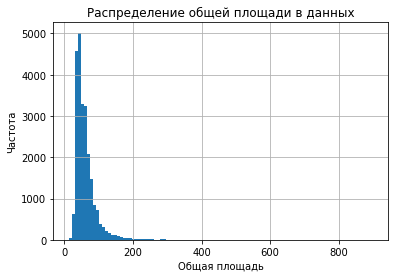

In [ ]:
plot = df['total_area'].plot(kind = 'hist', bins = 100, grid = True, 
                      title = 'Распределение общей площади в данных')
plot.set_xlabel('Общая площадь')
plot.set_ylabel('Частота')
plt.show()

Слишком большие выбросы, обрезаю до 400, чтобы лучше увидеть основную массу распределения.

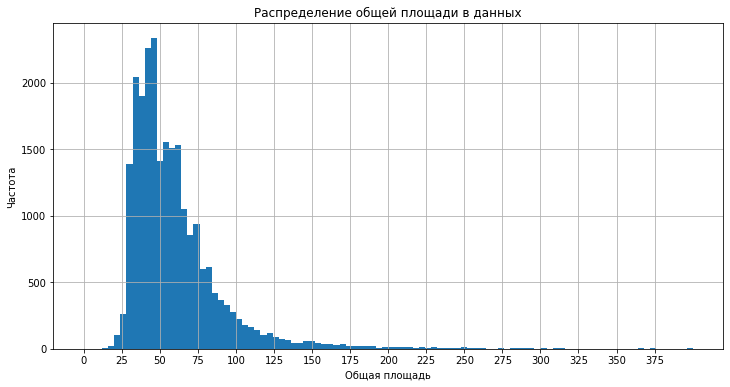

In [ ]:
plot = df['total_area'].plot(kind = 'hist', bins = 100, range = (0,400), xticks = range(0,400,25), grid = True, 
                      title = 'Распределение общей площади в данных', figsize = (12,6))
plot.set_xlabel('Общая площадь')
plot.set_ylabel('Частота')
plt.show()

По распределению видно, что основная масса находится в диапазоне 20-150, имеются выбросы вплоть до 900

In [ ]:
df['total_area'].sort_values(ascending = True)

19904     12.0
17961     13.0
19546     13.0
19807     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23699, dtype: float64

In [ ]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [ ]:
df['total_area'].sort_values(ascending = False).head(10)

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64

In [ ]:
df.loc[19540]

last_price                        420000000
total_area                              900
first_day_exposition    2017-12-06 00:00:00
rooms                                    12
ceiling_height                          2.8
floors_total                             25
living_area                           409.7
floor                                    25
kitchen_area                            112
balcony                                   0
locality_name               Санкт-Петербург
cityCenters_nearest                    7877
days_exposition                         106
sq_price                             466666
year_exposition                        2017
month_exposition                         12
weekday_exposition                        2
floor_group                       последний
kitchen_to_total                   0.124444
living_to_total                    0.455222
Name: 19540, dtype: object

In [ ]:
df.query('total_area > 300').head(10).sort_values('last_price', ascending = False)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition,sq_price,year_exposition,month_exposition,weekday_exposition,floor_group,kitchen_to_total,living_to_total
1026,155000000,310.0,2018-10-12,5,5.30,3,190.0,3,63.0,2,Санкт-Петербург,4785,<NA>,500000,2018,10,4,последний,0.203226,0.612903
793,135000000,310.0,2018-05-22,4,3.30,5,250.0,2,50.0,0,Санкт-Петербург,7251,342,435483,2018,5,1,другой,0.161290,0.806452
2243,130278280,304.0,2015-07-24,5,3.11,9,95.0,7,NaN,0,Санкт-Петербург,5913,599,428546,2015,7,4,другой,NaN,0.312500
155,96000000,317.0,2017-07-07,4,3.50,3,183.0,3,NaN,1,Санкт-Петербург,1771,62,302839,2017,7,4,последний,NaN,0.577287
1085,75000000,323.0,2017-07-10,5,4.00,5,255.7,4,66.0,0,Санкт-Петербург,594,259,232198,2017,7,0,другой,0.204334,0.791641
581,65000000,365.0,2019-03-18,7,2.90,7,145.0,7,NaN,0,Санкт-Петербург,1690,<NA>,178082,2019,3,0,последний,NaN,0.397260
1494,65000000,364.0,2018-11-27,7,3.90,6,250.0,3,20.0,0,Санкт-Петербург,3254,46,178571,2018,11,1,другой,0.054945,0.686813
1388,59800000,399.0,2015-01-21,5,5.60,6,95.0,6,NaN,0,Санкт-Петербург,6934,719,149874,2015,1,2,последний,NaN,0.238095
660,49950000,483.9,2017-10-04,7,3.20,6,312.5,4,26.4,0,Санкт-Петербург,945,391,103223,2017,10,2,другой,0.054557,0.645795
866,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,16.6,0,Санкт-Петербург,7950,418,68870,2017,12,5,другой,0.045730,0.611570


В столбце total_area аномалий не замечено. Довольно много пентхаусов и ценники соответствующие.

In [ ]:
df['last_price_mln'] = df['last_price'] / 1000000

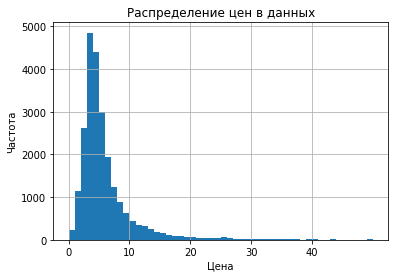

In [ ]:
plot = df['last_price_mln'].plot(kind = 'hist', bins = 50, range = (0,50), xticks = range(0,50, 10),
                         grid = True, title = 'Распределение цен в данных')
plot.set_xlabel('Цена')
plot.set_ylabel('Частота')
plt.show()

По распределению видно, что основная масса цен находится в диапазоне 0-20 млн, остальное можно считать выбросами.

В столбце last_price аномалий так же не замечено. Распределение примерно соответствует распределению площадей.

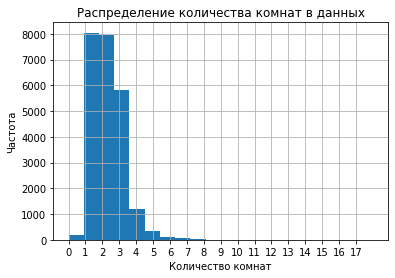

In [ ]:
plot = df['rooms'].plot(kind = 'hist', grid = True, bins = 20, range = (0,18), xticks = range(0,18,1),
                title = 'Распределение количества комнат в данных')
plot.set_xlabel('Количество комнат')
plot.set_ylabel('Частота')
plt.show()

В столбце rooms данные похожи на правду

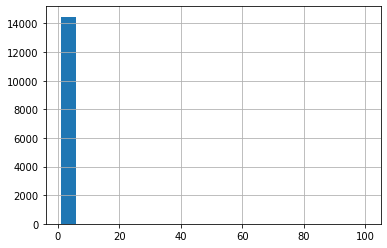

In [ ]:
df['ceiling_height'].hist(bins = 20)

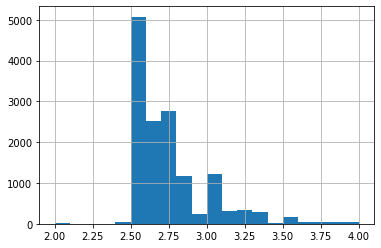

In [ ]:
df['ceiling_height'].hist(bins = 20, range = (2,4))

In [ ]:
df['ceiling_height'].isna().sum()

9195

In [ ]:
df['ceiling_height'].mean()

2.7714988968559835

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.8)

In [ ]:
def ceiling(row):
    ceiling = row
    if ceiling > 15:
        return 2.8
    if ceiling < 2.2:
        return 2.8

In [ ]:
df['ceiling_height2'] = df['ceiling_height'].apply(ceiling)

In [ ]:
df['ceiling_height2'] = df['ceiling_height2'].fillna(df['ceiling_height'])

In [ ]:
df['ceiling_height'] = df['ceiling_height2']

In [ ]:
df = df.drop(['ceiling_height2'], axis = 1)

In [ ]:
df['ceiling_height'].sort_values()

12755     2.20
17794     2.25
1582      2.30
17762     2.30
5498      2.30
         ...  
3474      8.00
17442     8.00
5863      8.30
22309    10.30
15061    14.00
Name: ceiling_height, Length: 23699, dtype: float64

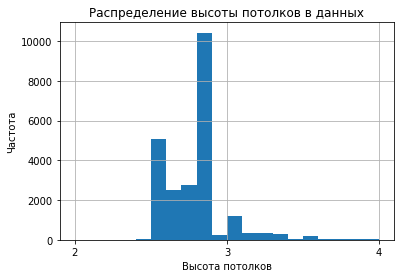

In [ ]:
plot = df['ceiling_height'].plot(kind = 'hist', bins = 20, range = (2,4), grid = True,
                         xticks = range(2,5,1), title = 'Распределение высоты потолков в данных')
plot.set_xlabel('Высота потолков')
plot.set_ylabel('Частота')
plt.show()

С потолками явно что-то не так, имеются нулевые значения и стремящиеся к 100. Привел значения больше 15 и меньше 2.2 к 2.8.

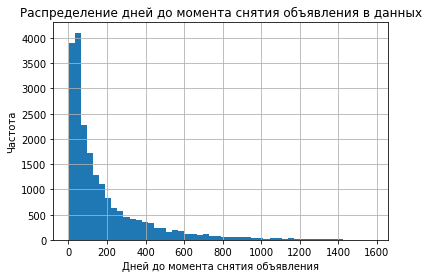

In [ ]:
plot = df['days_exposition'].plot(kind = 'hist', bins = 50, grid = True,
                           title = 'Распределение дней до момента снятия объявления в данных')
plot.set_xlabel('Дней до момента снятия объявления')
plot.set_ylabel('Частота')
plt.show()

In [ ]:
df['days_exposition'].mean()

180.88863436982163

In [ ]:
df['days_exposition'].median()

95.0

In [ ]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее в два раза больше медианы из-за выбросов в 1600 дней. Вероятно кто-то выставил очень большую цену или не особо хотел продавать квартиру.

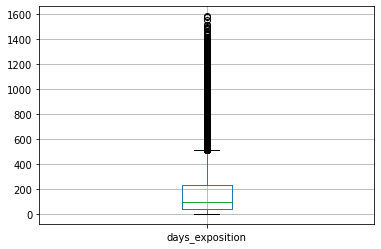

In [ ]:
df.boxplot('days_exposition')

In [ ]:
sample = df.dropna(subset = ['days_exposition']).reset_index(drop = True).copy()

In [ ]:
sample = sample.loc[(sample['days_exposition'] <= 600) & (sample['days_exposition'] >= 10)]

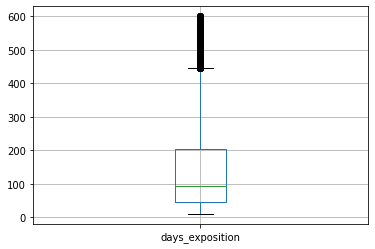

In [ ]:
sample.boxplot('days_exposition')

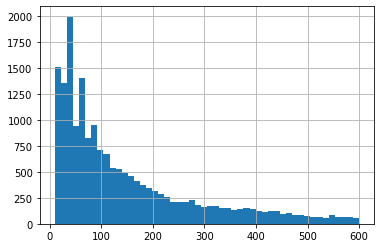

In [ ]:
sample['days_exposition'].hist(bins = 50)

In [ ]:
sample['days_exposition'].sort_values(ascending = True).head(10)

14861    10
10770    10
1493     10
6266     10
13551    10
18676    10
9773     10
1522     10
7857     10
12782    10
Name: days_exposition, dtype: Int64

In [ ]:
sample['days_exposition'].describe()

count    18190.000000
mean       147.451402
std        136.989011
min         10.000000
25%         45.000000
50%         95.000000
75%        205.000000
max        600.000000
Name: days_exposition, dtype: float64

In [ ]:
sample['ceiling_height'].describe()

count    18190.000000
mean         2.753176
std          0.242105
min          2.200000
25%          2.600000
50%          2.800000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

Ограничил время продажи до 600 дней, больше уже слишком много и вряд ли эту квартиру вообще продали. Минимум оставил 10, так как меньшее значение выглядит так, будто квартиру почти сразу сняли с продажи (передумали?).

Необычно долгими можно считать продажи длительностью более 600 дней (600 дней было выбрано, основываясь на распределении), а необычно быстрыми менее 10 дней.

In [ ]:
sample1 = sample[sample['last_price'] <= 50000000]

In [ ]:
sample['last_price'][sample['last_price'] > 50000000].count() / len(sample)

0.004672897196261682

Отфильтровал слишком большие выбросы с ценой более 50млн, потерял всего 0.4%

In [ ]:
sample1['last_price'].corr(sample1['total_area'])

0.7812915358487059

В процессе уменьшения цены четко прослеживалось увеличение коэффициента корреляции. Было принято решение для исследования дальнейших зависимостей уменьшить цену до 50кк

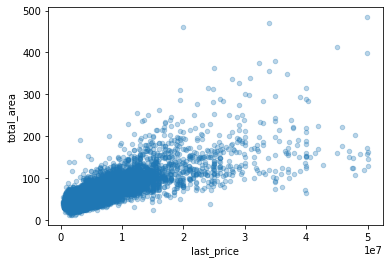

In [ ]:
sample1.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3) 

На графике четко прослеживается зависимость цены от общей площади (чем больше площадь, тем выше цена).

In [ ]:
sample1['rooms'].unique()

array([ 1,  2,  3,  4,  0,  5,  7,  6, 14,  8,  9, 19, 10])

In [ ]:
sample1['last_price'].corr(sample1['rooms'])

0.5092672815335217

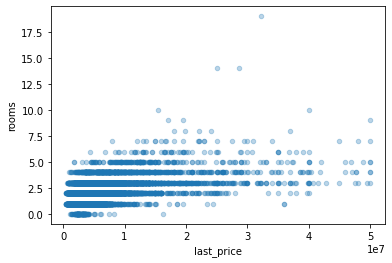

In [ ]:
sample1.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3) 

На графике видно, что при увеличении количества комнат увеличивается не сколько цена, сколько диапазон возможных цен.

In [ ]:
sample2 = sample1.dropna(subset = ['cityCenters_nearest']).reset_index(drop = True).copy()

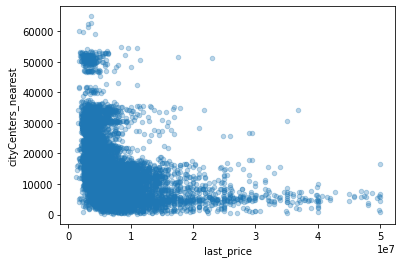

In [ ]:
sample2.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.3) 

На графике видно, что при цене до ~500к не особо имеет значение расстояние до центра, хотя имеется странный пропуск в диапазоне расстояний 35к-45к. Однако после цены 500к расстояние до центра заменто начинает опускаться до значения менее 100к. Есть предположение, что стоит построить такой же график только для города, где расстояние до центра действительно имеет значение.

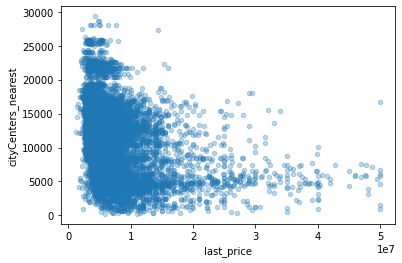

In [ ]:
sample2[sample2['locality_name'] == 'Санкт-Петербург'].plot(
    x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.3)

Хотя здесь картина похожая: для цены ниже 1кк плотность распределения цены от расстояния до центра примерно одинаковая (правда после 20к раcстояния - уменьшается), а после 1кк расстояние постепенно уменьшается.

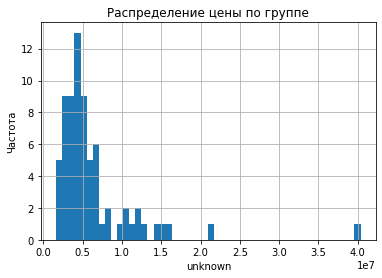

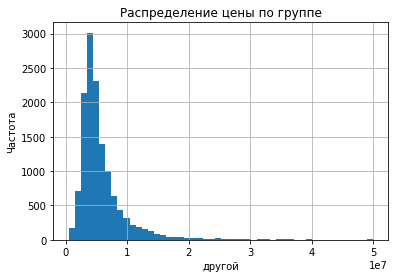

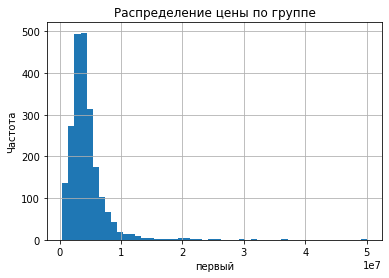

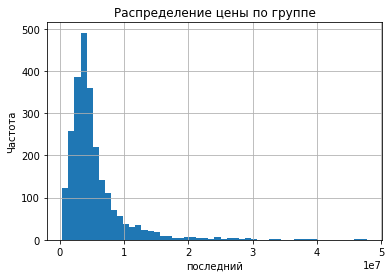

In [ ]:
for name, group_data in sample1.groupby('floor_group'):
    plot = group_data.plot(kind = 'hist', y = 'last_price', title = 'Распределение цены по группе'
                           , bins = 50, grid = True, legend = False)
    plot.set_xlabel(name)
    plot.set_ylabel('Частота')
    plt.show()

In [ ]:
def numerator(data):
    row = data['floor_group']
    if row == 'первый':
        return 0
    if row == 'последний':
        return 1
    return 2

In [ ]:
sample1['floor_group_numeric'] = sample1.apply(numerator, axis = 1).copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sample1['floor_group_numeric'].value_counts()

2    13435
1     2477
0     2193
Name: floor_group_numeric, dtype: int64

In [ ]:
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


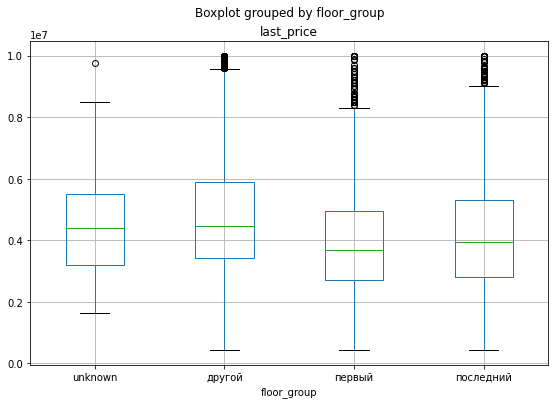

In [ ]:
sample[sample['last_price'] <= 10000000].boxplot('last_price', by = 'floor_group', figsize = (9,6))

На графике видно, что медианная цена распределена следующим образом:
- другой этаж - самая высокая;
- последний этаж - второй по стоимости;
- первый - самая низкая.

In [ ]:
sample['year_exposition'] = pd.DatetimeIndex(sample['first_day_exposition']).year
sample['month_exposition'] = pd.DatetimeIndex(sample['first_day_exposition']).month
sample['weekday_exposition'] = pd.DatetimeIndex(sample['first_day_exposition']).weekday

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


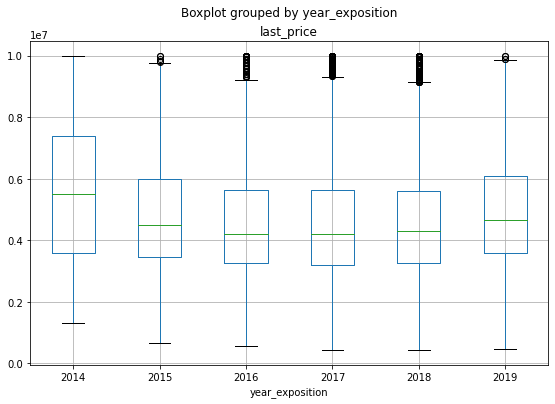

In [ ]:
sample[sample['last_price'] <= 10000000].boxplot('last_price', by = 'year_exposition', figsize = (9,6))

In [ ]:
sample.groupby('year_exposition')['last_price'].median()

year_exposition
2014    7388280
2015    4990000
2016    4450000
2017    4500000
2018    4500000
2019    4800000
Name: last_price, dtype: int64

Медианная цена на недвижимость, начиная с 2014 года начала падать, при этом между 2014-2015 довольно большой скачок (2.4 млн) и к 2019 поднялась на 300к. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


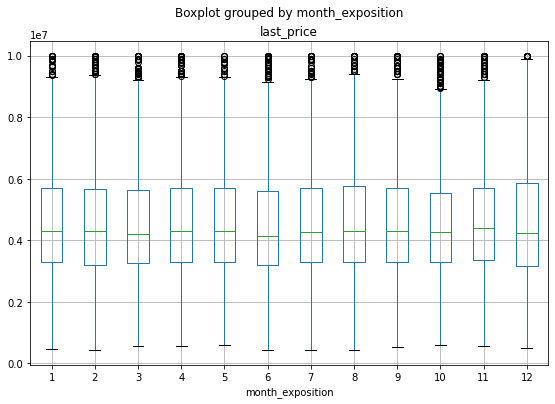

In [ ]:
sample[sample['last_price'] <= 10000000].boxplot('last_price', by = 'month_exposition', figsize = (9,6))

In [ ]:
sample.groupby('month_exposition')['last_price'].median()

month_exposition
1     4500000
2     4500000
3     4450000
4     4500000
5     4500000
6     4350000
7     4550000
8     4500000
9     4600000
10    4500000
11    4625000
12    4500000
Name: last_price, dtype: int64

In [ ]:
sample.groupby('month_exposition')['last_price'].median().describe()

count    1.200000e+01
mean     4.506250e+06
std      6.918766e+04
min      4.350000e+06
25%      4.500000e+06
50%      4.500000e+06
75%      4.512500e+06
max      4.625000e+06
Name: last_price, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


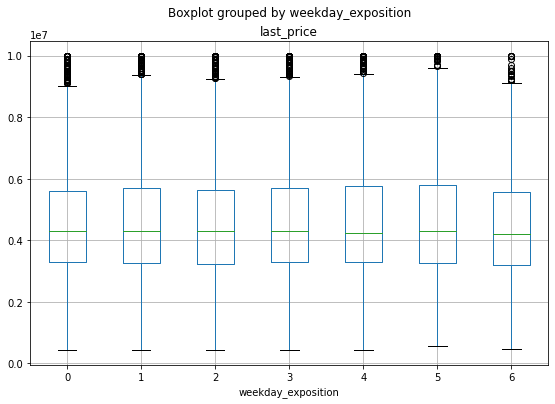

In [ ]:
sample[sample['last_price'] <= 10000000].boxplot('last_price', by = 'weekday_exposition', figsize = (9,6))

In [ ]:
sample.groupby('weekday_exposition')['last_price'].median()

weekday_exposition
0    4500000
1    4550000
2    4500000
3    4550000
4    4450000
5    4500000
6    4450000
Name: last_price, dtype: int64

In [ ]:
sample.groupby('weekday_exposition')['last_price'].median().describe()

count    7.000000e+00
mean     4.500000e+06
std      4.082483e+04
min      4.450000e+06
25%      4.475000e+06
50%      4.500000e+06
75%      4.525000e+06
max      4.550000e+06
Name: last_price, dtype: float64

Зависимость от дня и месяца размещения практически отсутствует

In [ ]:
filt = sample.query('locality_name != "Санкт-Петербург"').groupby('locality_name').agg(
    'count').sort_values('last_price', ascending=False).head(10)

In [ ]:
rating = sample[sample['locality_name'].isin(filt.index)].groupby('locality_name')['sq_price'].median(
).sort_values(ascending=False)

In [ ]:
rating

locality_name
Пушкин        97725.5
Кудрово       95185.0
Парголово     90671.5
Мурино        86231.0
Петергоф      81818.0
Шушары        76562.0
Колпино       73378.0
Гатчина       67123.0
Всеволожск    65811.0
Выборг        56818.0
Name: sq_price, dtype: float64

Самая высокая медианная цена за квадратный метр в Пушкине, самая низкая в Выборге

In [ ]:
piter = sample[sample['locality_name'] == 'Санкт-Петербург'].copy()

In [ ]:
piter = piter.dropna(subset = ['cityCenters_nearest']).reset_index(drop = True)

In [ ]:
piter.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition,sq_price,year_exposition,month_exposition,weekday_exposition,floor_group,kitchen_to_total,living_to_total,last_price_mln
0,5196000,56.0,2015-08-20,2,2.80,5,34.30,4,8.3,0,Санкт-Петербург,13933,558,92785,2015,8,3,другой,0.148214,0.612500,5.196
1,64900000,159.0,2015-07-24,3,2.80,14,45.76,9,NaN,0,Санкт-Петербург,6800,424,408176,2015,7,4,другой,NaN,0.287799,64.900
2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,41.0,0,Санкт-Петербург,8098,121,100000,2018,6,1,другой,0.410000,0.320000,10.000
3,5400000,61.0,2017-02-26,3,2.50,9,43.60,7,6.5,2,Санкт-Петербург,15008,289,88524,2017,2,6,другой,0.106557,0.714754,5.400
4,5050000,39.6,2017-11-16,1,2.67,12,20.30,3,8.5,0,Санкт-Петербург,13878,137,127525,2017,11,3,другой,0.214646,0.512626,5.050


In [ ]:
piter['center'] = piter['cityCenters_nearest'] / 1000

In [ ]:
piter['center'] = piter['center'].round(0)

In [ ]:
piter.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition,sq_price,year_exposition,month_exposition,weekday_exposition,floor_group,kitchen_to_total,living_to_total,last_price_mln,center
0,5196000,56.0,2015-08-20,2,2.80,5,34.30,4,8.3,0,Санкт-Петербург,13933,558,92785,2015,8,3,другой,0.148214,0.612500,5.196,14.0
1,64900000,159.0,2015-07-24,3,2.80,14,45.76,9,NaN,0,Санкт-Петербург,6800,424,408176,2015,7,4,другой,NaN,0.287799,64.900,7.0
2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,41.0,0,Санкт-Петербург,8098,121,100000,2018,6,1,другой,0.410000,0.320000,10.000,8.0
3,5400000,61.0,2017-02-26,3,2.50,9,43.60,7,6.5,2,Санкт-Петербург,15008,289,88524,2017,2,6,другой,0.106557,0.714754,5.400,15.0
4,5050000,39.6,2017-11-16,1,2.67,12,20.30,3,8.5,0,Санкт-Петербург,13878,137,127525,2017,11,3,другой,0.214646,0.512626,5.050,14.0


In [ ]:
piter = piter.loc[piter['last_price'] <= 20000000].copy()

In [ ]:
piter['sq_price'].corr(piter['center'])

-0.3204823282884763

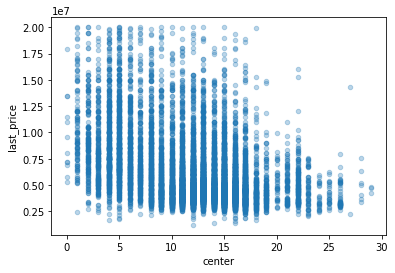

In [ ]:
piter.plot(x='center', y='last_price', kind='scatter', alpha=0.3) 

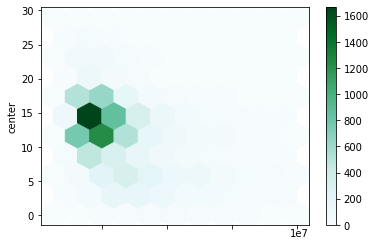

In [ ]:
piter.plot(x='last_price', y='center', kind='hexbin', gridsize = 10) 

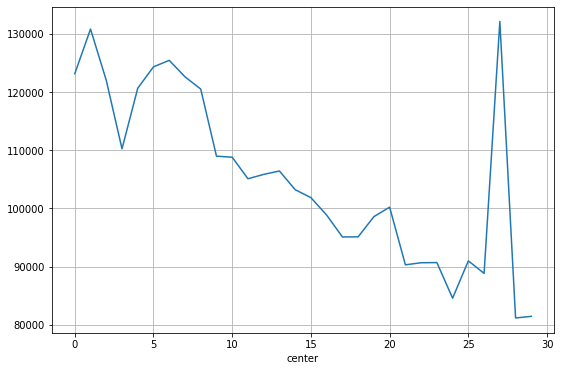

In [ ]:
piter.groupby('center')['sq_price'].mean().plot(figsize = (9,6), grid = True)

In [ ]:
piter_plot = piter.groupby('center')['sq_price'].mean().reset_index()

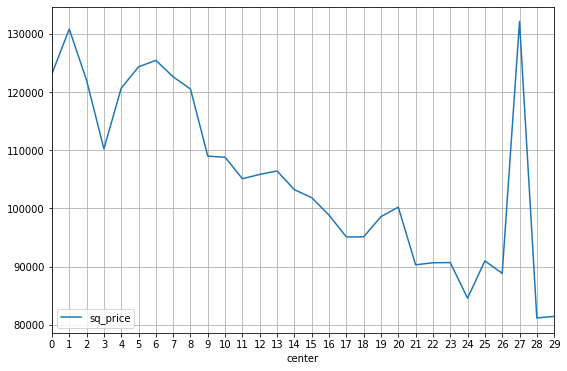

In [ ]:
piter_plot.plot(x = 'center', y = 'sq_price',figsize = (9,6), grid = True, xticks = range(0,30, 1), xlim = (0,29))

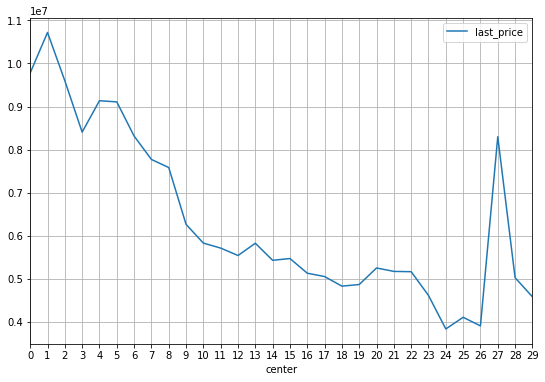

In [ ]:
piter2_plot = piter.groupby('center')['last_price'].mean().reset_index()
piter2_plot.plot(x = 'center', y = 'last_price',figsize = (9,6), grid = True, xticks = range(0,30, 1), xlim = (0,29))

Беру значение радиуса центра за 8 км, так как потом начинается большой спад.

In [ ]:
piter_center = piter.loc[piter['center'] <= 8].copy()

In [ ]:
piter_center.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition,sq_price,year_exposition,month_exposition,weekday_exposition,floor_group,kitchen_to_total,living_to_total,last_price_mln,center
2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,8098,121,100000,2018,6,1,другой,0.410000,0.320000,10.0,8.0
11,6500000,97.2,2015-10-31,2,2.80,3,46.5,1,19.6,0,Санкт-Петербург,2336,265,66872,2015,10,5,первый,0.201646,0.478395,6.5,2.0
29,20000000,118.0,2018-09-11,3,3.00,9,68.0,7,16.0,0,Санкт-Петербург,4800,37,169491,2018,9,1,другой,0.135593,0.576271,20.0,5.0
31,3400000,30.0,2018-09-05,1,2.80,5,16.0,1,7.0,0,Санкт-Петербург,8313,14,113333,2018,9,2,первый,0.233333,0.533333,3.4,8.0
40,9600000,90.0,2017-09-26,4,2.80,5,67.0,2,8.0,0,Санкт-Петербург,2818,104,106666,2017,9,1,другой,0.088889,0.744444,9.6,3.0


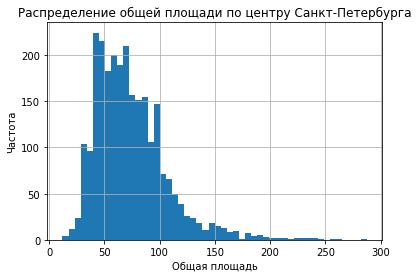

In [ ]:
plot = piter_center['total_area'].plot(kind = 'hist', bins = 50, grid = True,
                                title = 'Распределение общей площади по центру Санкт-Петербурга')
plot.set_xlabel('Общая площадь')
plot.set_ylabel('Частота')
plt.show()

На графике видно, что основная часть площадей находится в диапазоне 25 - 125.

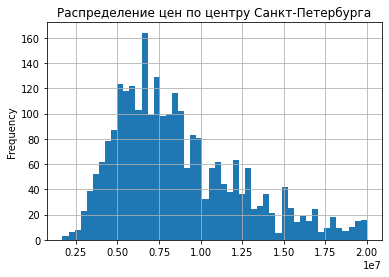

In [ ]:
piter_center['last_price'].plot(kind = 'hist', bins = 50, grid = True,
                                title = 'Распределение цен по центру Санкт-Петербурга')
plot.set_xlabel('Цена')
plot.set_ylabel('Частота')
plt.show()

На графике видно, что основная часть цен находится в диапазоне 2.5 - 13.0 млн, хотя шумы немного портят распределение.

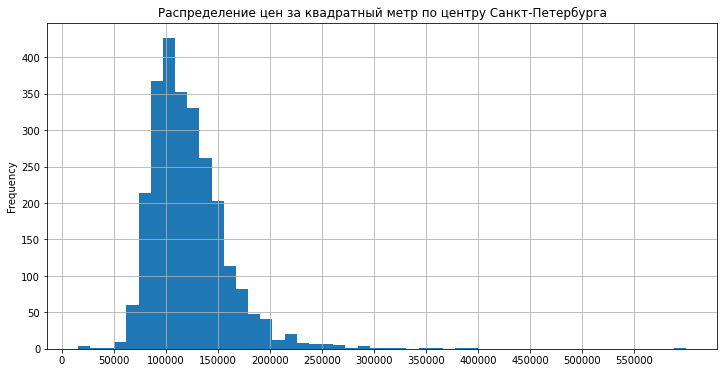

In [ ]:
piter_center['sq_price'].plot(kind = 'hist', bins = 50, grid = True, xticks = range(0,600000, 50000), figsize = (12,6),
                                title = 'Распределение цен за квадратный метр по центру Санкт-Петербурга')
plot.set_xlabel('Цена за квадратный метр')
plot.set_ylabel('Частота')
plt.show()

На графике видно, что основная часть цен за квадратный метр находится в диапазоне 75к - 175к. Так же имеем выбросы до 20000 и в большую сторону вплоть до 60000.

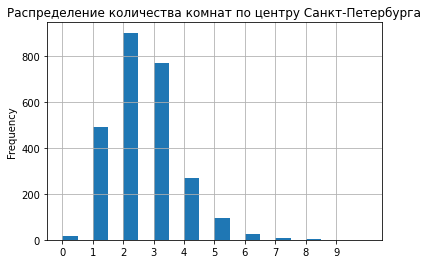

In [ ]:
piter_center['rooms'].plot(kind = 'hist', grid = True, bins = 20, xticks = range(0, 10, 1),
                                title = 'Распределение количества комнат по центру Санкт-Петербурга')
plot.set_xlabel('Количество комнат')
plot.set_ylabel('Частота')
plt.show()

Основная доля квартир это 2-х и 3-х комнатные.

Все распределения более-менее похожи на распределения основого дф, за исключением небольших шумов.

Дальше буду сравнивать центр со всем городом (без посёлков и прочего).

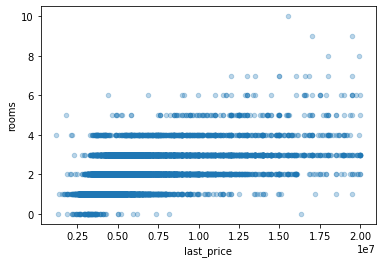

In [ ]:
piter.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

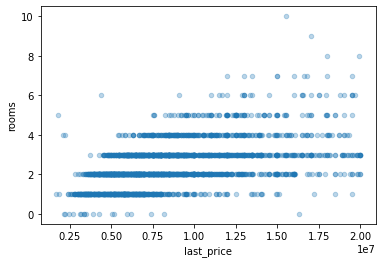

In [ ]:
piter_center.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

По влиянию количества комнат на цену центр города очень похож на весь город

In [ ]:
piter['floor_group'].unique()

array(['другой', 'первый', 'последний', 'unknown'], dtype=object)

In [ ]:
def floorg(row):
    if row == 'другой':
        return 1
    if row == 'первый':
        return 0
    if row == 'последний':
        return 2

In [ ]:
piter['floor_group'] = piter['floor_group'].apply(floorg)

In [ ]:
piter['floor_group'].value_counts()

1.0    8988
2.0    1339
0.0    1191
Name: floor_group, dtype: int64

In [ ]:
piter_center['floor_group'] = piter_center['floor_group'].apply(floorg)

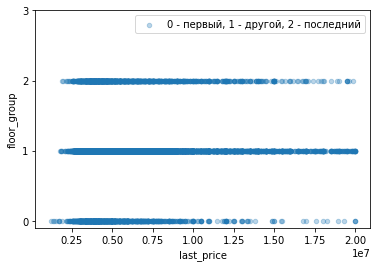

In [ ]:
plot = piter.plot(x='last_price', y='floor_group', kind='scatter', alpha=0.3, yticks = range(0,4,1), 
                  label='0 - первый, 1 - другой, 2 - последний')
plot.legend(loc='upper right')

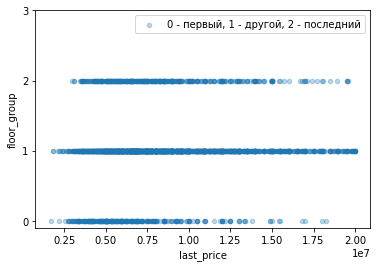

In [ ]:
plot = piter_center.plot(x='last_price', y='floor_group', kind='scatter', alpha=0.3, yticks = range(0,4,1), 
                  label='0 - первый, 1 - другой, 2 - последний')
plot.legend(loc='upper right')

Здесь то же самое - первый на последнем месте, потом последний, потом другой.

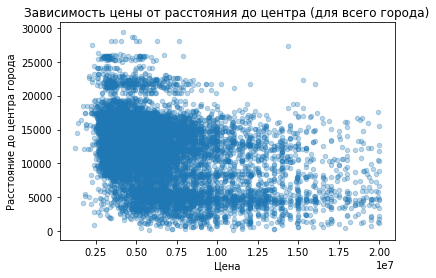

In [ ]:
plot = piter.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.3, 
                  title = 'Зависимость цены от расстояния до центра (для всего города)')
plot.set_xlabel('Цена')
plot.set_ylabel('Расстояние до центра города')
plt.show()

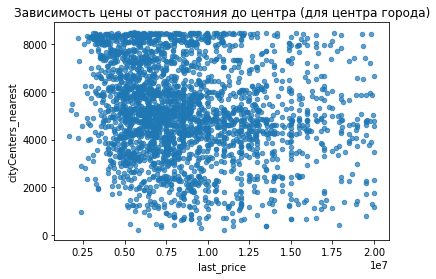

In [ ]:
piter_center.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.7, 
                  title = 'Зависимость цены от расстояния до центра (для центра города)')
plot.set_xlabel('Цена')
plot.set_ylabel('Расстояние до центра города')
plt.show()

Есть небольшая концентрация точек в районе 3500 метров. Остальное очень сильно разбросано.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


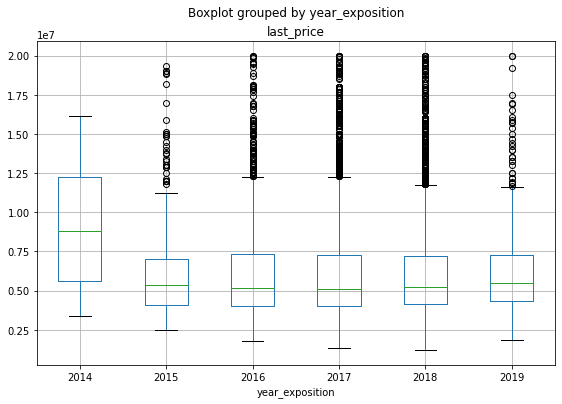

In [ ]:
piter.boxplot('last_price', by = 'year_exposition', figsize = (9,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


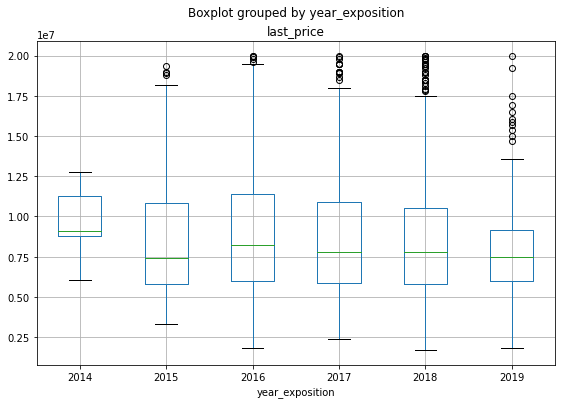

In [ ]:
piter_center.boxplot('last_price', by = 'year_exposition', figsize = (9,6))

Маловата выборка, нет данных за 2014 год. Сложно сказать как цена опустилась, однако видно, что к 2019 году она немного поднялась.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


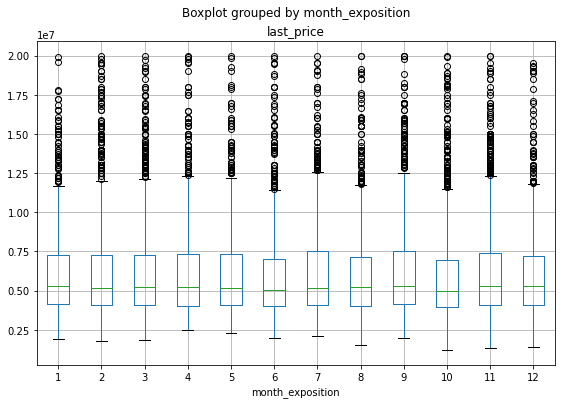

In [ ]:
piter.boxplot('last_price', by = 'month_exposition', figsize = (9,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


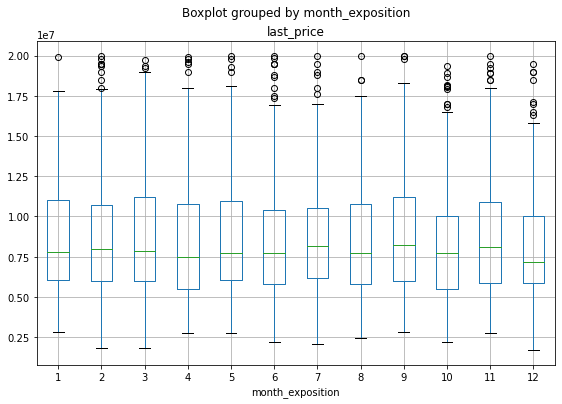

In [ ]:
piter_center.boxplot('last_price', by = 'month_exposition', figsize = (9,6))

Здесь разброс заметен побольше: в январе, феврале ценник чуть больше, чем в остальные месяцы, а в августе и ноябре заметно ниже. Хотя вряд ли это влияние месяца, скорее просто совпадение из-за маленькой выборки.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


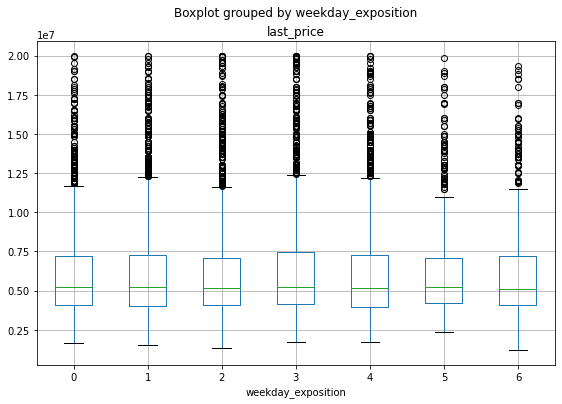

In [ ]:
piter.boxplot('last_price', by = 'weekday_exposition', figsize = (9,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


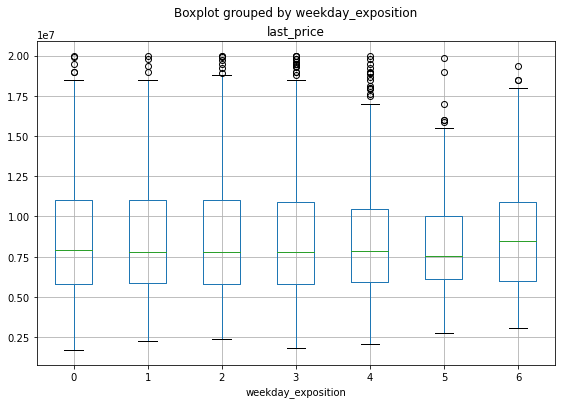

In [ ]:
piter_center.boxplot('last_price', by = 'weekday_exposition', figsize = (9,6))

Здесь такая же ситуация, как с месяцами. Скорее всего это просто влияние маленькой выборки.

## Общий вывод

Исследование объявлений о продаже квартир

В процессе исследования были выполнены следующие работы:
- заполнены пропуски в данных (где это возможно сделать);
- данные приведены к типам, удобным для работы;
- данные были разбиты на группы, удобные для работы;
- выявлены зависимости влияния разных факторов на стоимость квартиры;
- отдельно исследованы вышеуказанные зависимости для центра города, города и остальных "пунктов".

1 Ошибки в данных

Обнаружены пропуски в следующих столбцах:
-    ceiling_height — высота потолков (м);
-    floors_total — всего этажей в доме;
-    living_area — жилая площадь в квадратных метрах(м²);
-    is_apartment — апартаменты (булев тип);
-    kitchen_area — площадь кухни в квадратных метрах (м²);
-    balcony — число балконов;
-    locality_name — название населённого пункта;
-    airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
-    cityCenters_nearest — расстояние до центра города (м);
-    parks_around3000 — число парков в радиусе 3 км;
-    parks_nearest — расстояние до ближайшего парка (м);
-    ponds_around3000 — число водоёмов в радиусе 3 км;
-    ponds_nearest — расстояние до ближайшего водоёма (м);
-    days_exposition — сколько дней было размещено объявление (от публикации до снятия);
В процессе работы пропуски были заменены на нулевые, медианные или другие значения, необходимые для выполнения задачи, или же, в некоторых случаях, данные с пропусками не использовались для обработки. Стоит обратить внимаение на способ внесения данных в базу.

Так же в столбце с высотой потолков были обнаружены слишком больше выбросы: высота потолка 1 метр или 100 метров, что тоже является ошибкой внесения данных в базу.

2 Анализ данных

В общем для всех данных обнаружено, что:
- общая площадь квартиры имеет пуассоновское распределение, со средним значением 60 и медианным 52, при этом имеет небольшие выбросы по площади более 600 квадратных метров, что выглядит правдоподобным (пентхаусы или многоэтажные квартиры, дома);
- цена квартиры так же имеет пуассоновское распределение, со средним значением 6.54 млн и медианным 4.65 млн, при этам так же имеет небольшие выбросы по цене выше 20 млн;
- распределение комнат в данных показывает, что среднее количество комнат в продаваемых квартирах равно двум;
- с потолками было много неправдоподобных ошибок, которые были заменены на медианное значение по данным, в итоге получили наибольшее количество потолков с высотой 2.8 метра;
- количество дней от публикации до снятия имеет пуассоновское распределение, однако имелись большие выбросы в области крайне быстрой продажи (до 10 дней) и крайне длительной продажи (от 600 дней), которые были обрезаны.

3 Исследование данных

3.1 Исследование полного набора данных

В точности можно утверждать, что самое большое влияние на цену имеет общая площадь квартиры, эта пара имеет коэффициент корреляции 0.78. Чем больше площадь, тем выше цена.

Количество комнат так же имеет влияние на цену (что конечно же связано с тем, что чем больше комнат, тем больше и площадь квартиры). Имеем значение корреляции этой пары равным 0.5. Однако заметна интересная деталь - увеличение количества комнат сильно влияет на диапазон имеющихся цен, при этом низкие значения цен не уменьшаются в количестве относительно цены на квартиры с маленьким количеством комнат (увеличение количества комнат увеличивает диапазон цен на квартиры).

Влияние расстояния до центра города на цену для всего набора данных имеет интересную структуру: в области до 500 000 стоимости квартиры распределение равномерно относительно растояния до 350 километров. Однако в дальнейшем имеем сильное уменьшение расстояния в зависимости от увеличения цены. 
Далее было исследовано влияние расстояния до центра на стоимость квартиры только для Санкт-Петербурга (чтобы убрать влияние посёлков и т.п.). Картина похожая, однако здесь порог равномерного распределения стоимости квартиры - 1 млн.

Этажи были поделены на 4 группы: первый, последний, другой, неизвестный. Определены следующие закономерности:
- первый этаж имеет самую низкую медианную стоимость - 3.80 млн;
- последний этаж имеет вторую по возрастанию медианную стоимость - 4.20 млн;
- остальные этажи имеют самую большую медианную стоимость - 4.69 млн;
- группа квартир с неизвестным этажом имеет медианную стоимость 4.7 млн, что говорит о том, что их скорее всего стоило бы определить в другие, однако неизвестно, к какой категории они относятся в действительности и было принято решение вынести их в отдельную группу.

Так же обнаружено, что в 2014 году медианная стоимость квартиры самая высокая и имеет значение 7.38 млн. В 2015 году медианная стоимость упала на 2.4 млн и еще на 500 000 в 2016, только потом начала медленно восстанавливаться, достигнув значения в 4.8 млн в 2019 году

Влияния месяца или дня недели на стоимость квартиры не обнаружено, отклонение составляет всего 70 000 для месяца и 40000 для дня недели, что незначительно относительно стоимости.

3.2 Исследование данных по "посёлкам"

Обнаружено, что стоимость медианная стоимость квадратного метра в Пушкине самая высокая и составляет 97725. В Выборге 56818, что является самым низким значением.

3.3 Исследование данных для Санкт-Петербурга

Определено значение центральной области радиусом в 8 километров относительно центральной точки.

Распределения общей площади и стоимости соответствуют распределению соответствующих параметров в общей базе. Так же влияние количества комнат и этажа на стоимость квартиры соответствует общей базе. 

Стоимость относительно расстояния до центра для центральной области города крайне неравномерна: имеем небольшую концентрацию при стоимости 5-8 млн, однако остальное распределение неравномерно.

В связи с отсутствием в выборке для центра Санкт-Петербурга данных за 2014 год невозможно сказать как цена изменилась за 2014-2015, однако для остальных годов изменение цен выглядит синусоидально и имеет наибольшее значение в 2016 году (9.4 млн), а следующее за ним 2019 - 9.3 млн.

Разброс стоимости по месяцам следующий: в январе и феврале стоимость выше остальных, а в августе и ноябре заметно ниже, однако стоит упомянуть, что выборка для центра Санкт-Петербурга маленькая и это скорее всего шум.

С влиянием дня недели подачи объявления такая же ситуация, как и с месяцами - разброс имеется, однако это выглядит, как шум.